In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656 entries, 0 to 7655
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   7656 non-null   int16  
 1   mês                   7656 non-null   object 
 2   grande_regiao         7656 non-null   string 
 3   unidade_da_federacao  7656 non-null   string 
 4   produto               7656 non-null   string 
 5   localizacao           7656 non-null   string 
 6   producao              7656 non-null   float64
dtypes: float64(1), int16(1), object(1), string(4)
memory usage: 374.0+ KB
None
    ano  mês grande_regiao unidade_da_federacao   produto localizacao  \
0  1997  JAN  REGIÃO NORTE             AMAZONAS  PETRÓLEO       TERRA   
1  1997  FEV  REGIÃO NORTE             AMAZONAS  PETRÓLEO       TERRA   
2  1997  MAR  REGIÃO NORTE             AMAZONAS  PETRÓLEO       TERRA   
3  1997  ABR  REGIÃO NORTE             AMAZONAS  PETRÓLEO      

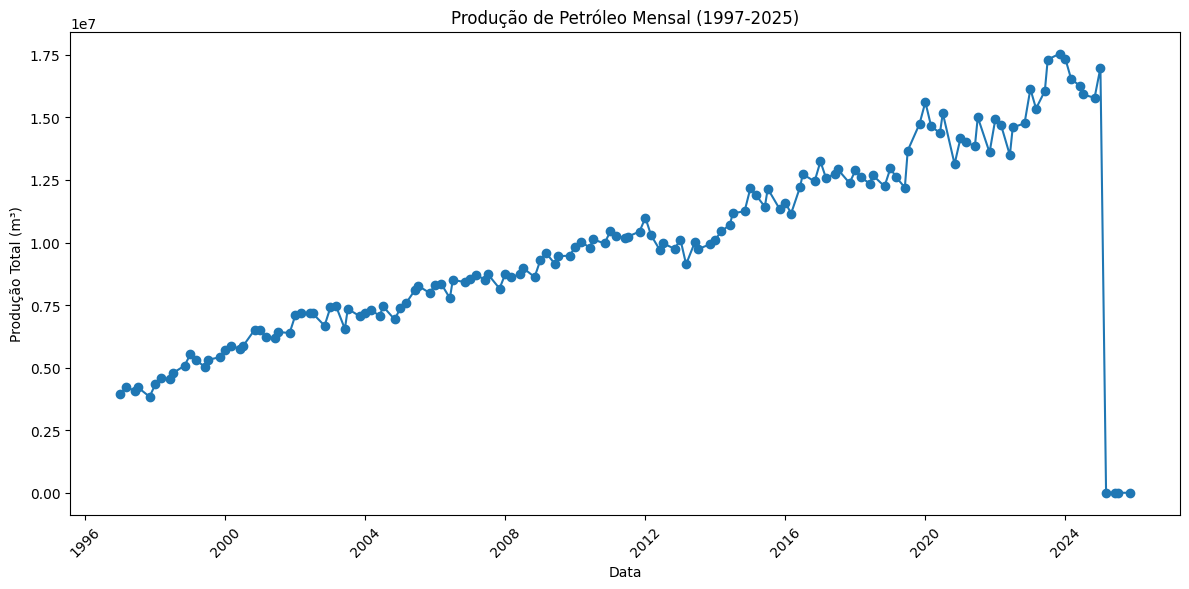

In [9]:
df_producao = pd.read_pickle('dataset/producao-petroleo-m3-1997-2025_tratado.pkl')

print(df_producao.info())
print(df_producao.head())

# Criar coluna "data" combinando ano e mês (assumindo o dia 1)
df_producao['data'] = pd.to_datetime(df_producao['ano'].astype(str) + '-' + df_producao['mês'].astype(str) + '-01', errors='coerce')

# Agrupar por data: somar a produção total de petróleo para cada mês
df_producao_mensal = df_producao.groupby('data')['producao'].sum().reset_index()

# Plotar a produção mensal
plt.figure(figsize=(12,6))
plt.plot(df_producao_mensal['data'], df_producao_mensal['producao'], marker='o', linestyle='-')
plt.xlabel('Data')
plt.ylabel('Produção Total (m³)')
plt.title('Produção de Petróleo Mensal (1997-2025)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175325 entries, 0 to 175324
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ano            175325 non-null  int16 
 1   grande_regiao  175325 non-null  string
 2   uf             175322 non-null  string
 3   produto        175325 non-null  string
 4   código_ibge    175325 non-null  int64 
 5   município      175325 non-null  object
 6   vendas         175325 non-null  int64 
dtypes: int16(1), int64(2), object(1), string(3)
memory usage: 8.4+ MB
None
    ano grande_regiao  uf     produto  código_ibge              município  \
0  1990  REGIÃO NORTE  RO  GASOLINA C      1100015  ALTA FLORESTA D'OESTE   
1  1990  REGIÃO NORTE  RO  GASOLINA C      1100023              ARIQUEMES   
2  1990  REGIÃO NORTE  RO  GASOLINA C      1100049                 CACOAL   
3  1990  REGIÃO NORTE  RO  GASOLINA C      1100288         ROLIM DE MOURA   
4  1990  REGIÃO NORTE  RO  GASOLI

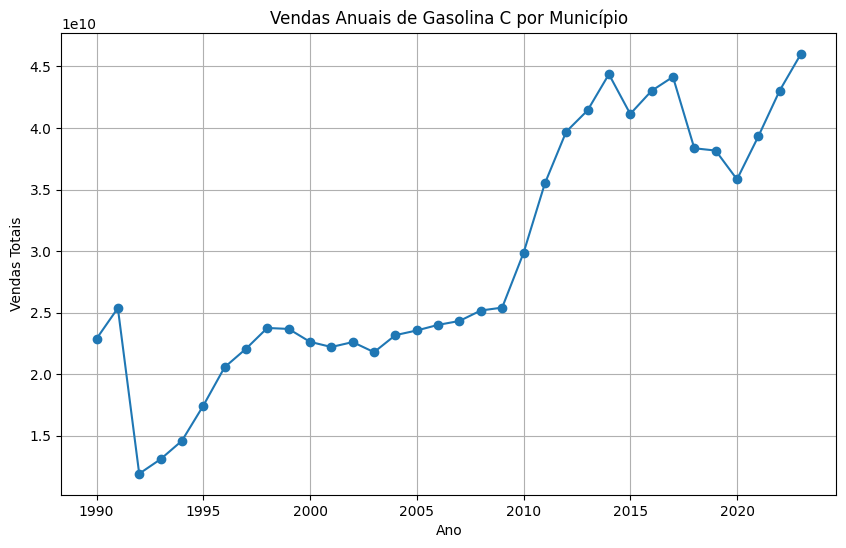

In [ ]:
df_vendas = pd.read_pickle('dataset/vendas-anuais-de-gasolina-c-por-municipio_tratado.pkl')
print(df_vendas.info())
print(df_vendas.head())

# Agrupar por ano somando as vendas
df_vendas_anuais = df_vendas.groupby('ano')['vendas'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_vendas_anuais['ano'], df_vendas_anuais['vendas'], marker='o', linestyle='-')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais')
plt.title('Vendas Anuais de Gasolina C por Município')
plt.grid(True)
plt.show()

In [16]:
df_petroleo = pd.read_pickle("dataset/dados_petroleo_semanal.pkl")
df_usd = pd.read_pickle("dataset/dados_usd_brl_semanal.pkl")

In [25]:
print(df_petroleo.head())
print(df_usd.head())

        Data  Último  Abertura  Máxima  Mínima  Vol.  Var%
0 2023-12-31   78.76     77.39   79.41   74.79   NaN  2.23
1 2023-12-24   77.04     79.04   81.72   76.73   NaN -2.57
2 2023-12-17   79.07     76.80   80.60   75.76   NaN  3.29
3 2023-10-12   76.55     75.73   77.35   72.29   NaN  0.94
4 2023-03-12   75.84     79.50   79.72   73.60   NaN -3.85
        Data  Último  Abertura  Máxima  Mínima  Vol.  Var%
0 2023-12-31  4.8743    4.8534  4.9407  4.8489   NaN  0.46
1 2023-12-24  4.8521    4.8513  4.8714  4.8018   NaN -0.13
2 2023-12-17  4.8585    4.9414  4.9520  4.8481   NaN -1.59
3 2023-10-12  4.9371    4.9268  4.9773  4.8749   NaN  0.11
4 2023-03-12  4.9317    4.8780  4.9680  4.8780   NaN  1.06


In [24]:
print(df_petroleo.info())
print(df_usd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      522 non-null    datetime64[ns]
 1   Último    522 non-null    float64       
 2   Abertura  522 non-null    float64       
 3   Máxima    522 non-null    float64       
 4   Mínima    522 non-null    float64       
 5   Vol.      0 non-null      float64       
 6   Var%      522 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 28.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      522 non-null    datetime64[ns]
 1   Último    522 non-null    float64       
 2   Abertura  522 non-null    float64       
 3   Máxima    522 non-null    float64       
 4   Mínima    522 non-null    float6

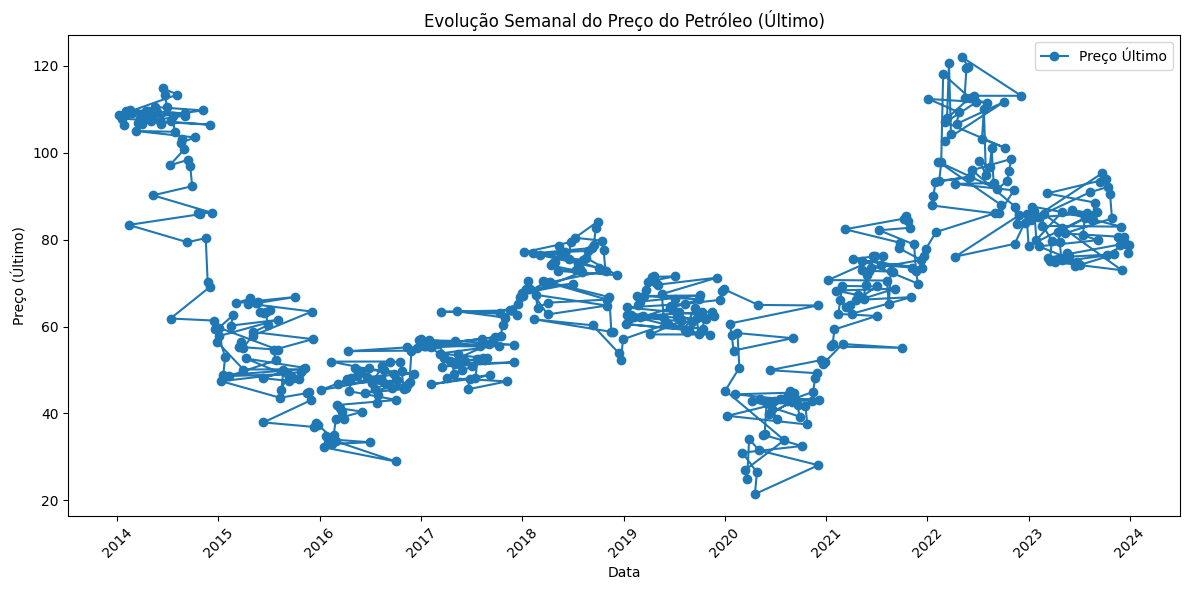

In [17]:
# Evolução Semanal do Preço "Último" do Petróleo
plt.figure(figsize=(12,6))
plt.plot(df_petroleo["Data"], df_petroleo["Último"], label="Preço Último", marker='o', linestyle='-')
plt.xlabel("Data")
plt.ylabel("Preço (Último)")
plt.title("Evolução Semanal do Preço do Petróleo (Último)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

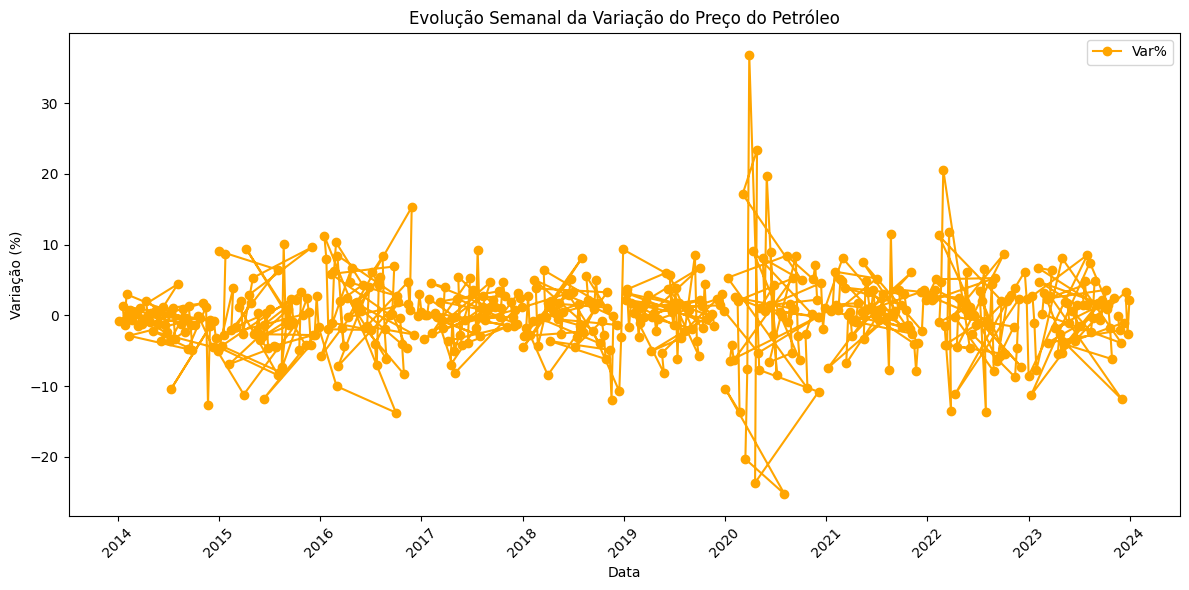

In [18]:
#Evolução Semanal da Variação (%) do Petróleo
plt.figure(figsize=(12,6))
plt.plot(df_petroleo["Data"], df_petroleo["Var%"], label="Var%", marker='o', linestyle='-', color='orange')
plt.xlabel("Data")
plt.ylabel("Variação (%)")
plt.title("Evolução Semanal da Variação do Preço do Petróleo")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

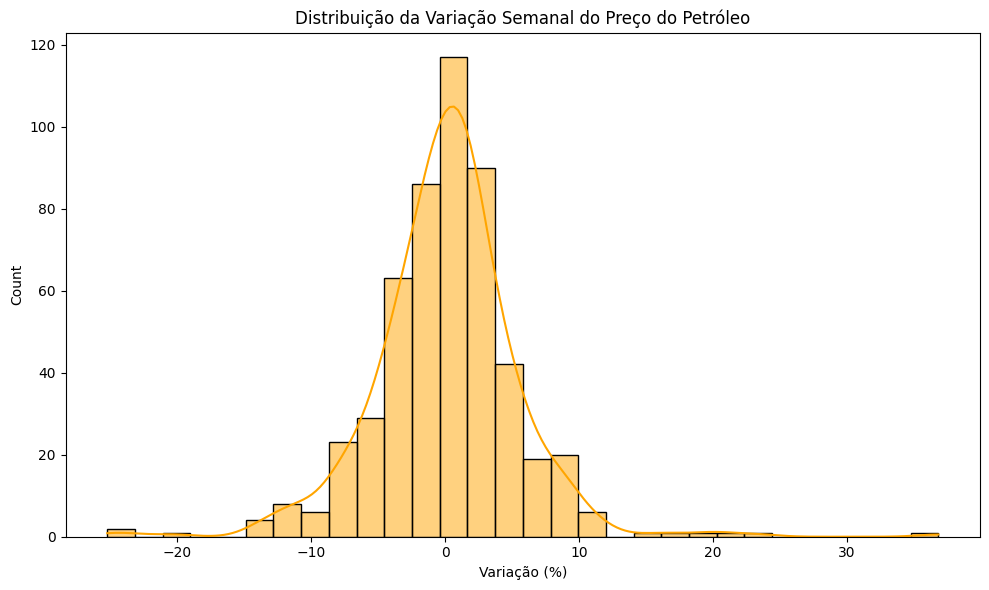

In [20]:
#Distribuição da Variação (%) do Petróleo (Histograma)
plt.figure(figsize=(10,6))
sns.histplot(df_petroleo["Var%"].dropna(), bins=30, kde=True, color='orange')
plt.xlabel("Variação (%)")
plt.title("Distribuição da Variação Semanal do Preço do Petróleo")
plt.tight_layout()
plt.show()

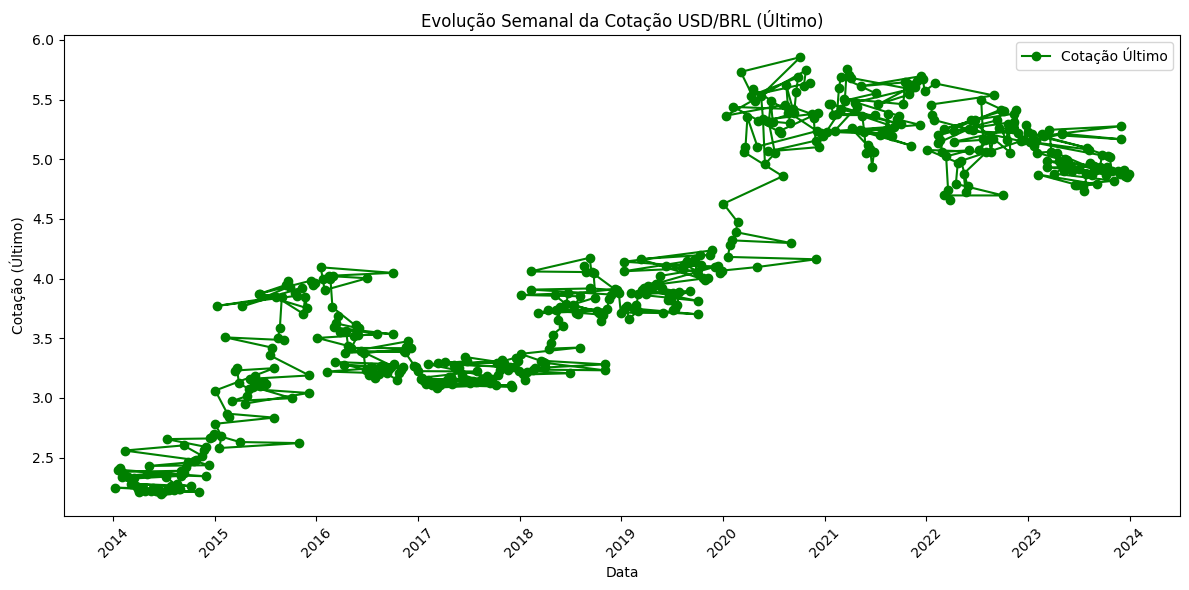

In [21]:
#Evolução Semanal da Cotação "Último" do USD/BRL
plt.figure(figsize=(12,6))
plt.plot(df_usd["Data"], df_usd["Último"], label="Cotação Último", marker='o', linestyle='-', color='green')
plt.xlabel("Data")
plt.ylabel("Cotação (Último)")
plt.title("Evolução Semanal da Cotação USD/BRL (Último)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

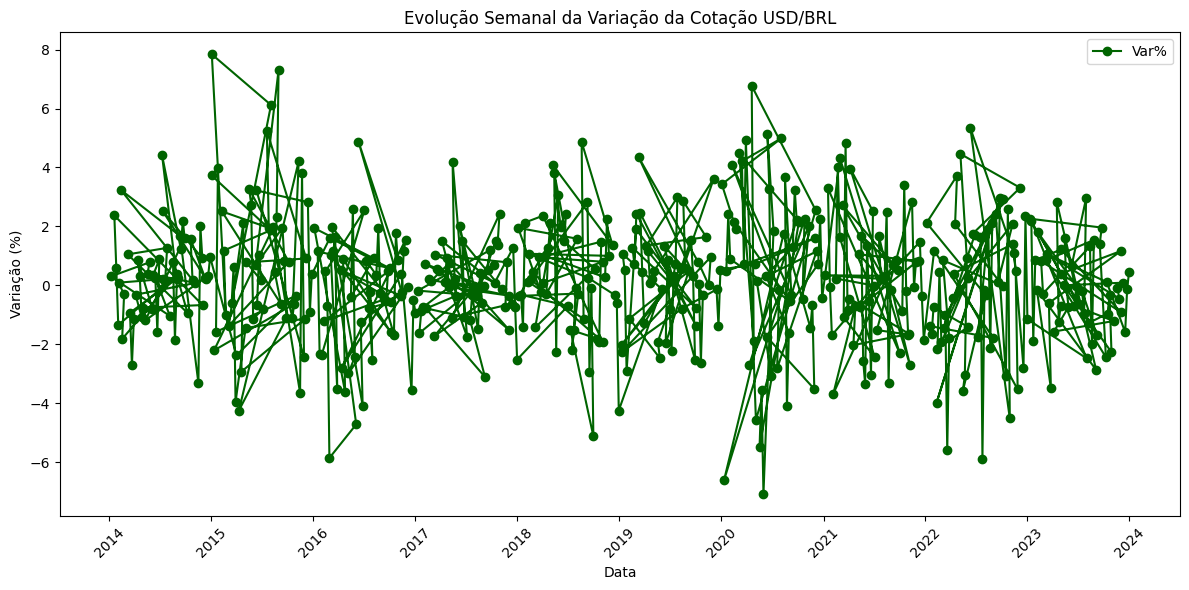

In [22]:
#Evolução Semanal da Variação (%) da Cotação USD/BRL
plt.figure(figsize=(12,6))
plt.plot(df_usd["Data"], df_usd["Var%"], label="Var%", marker='o', linestyle='-', color='darkgreen')
plt.xlabel("Data")
plt.ylabel("Variação (%)")
plt.title("Evolução Semanal da Variação da Cotação USD/BRL")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

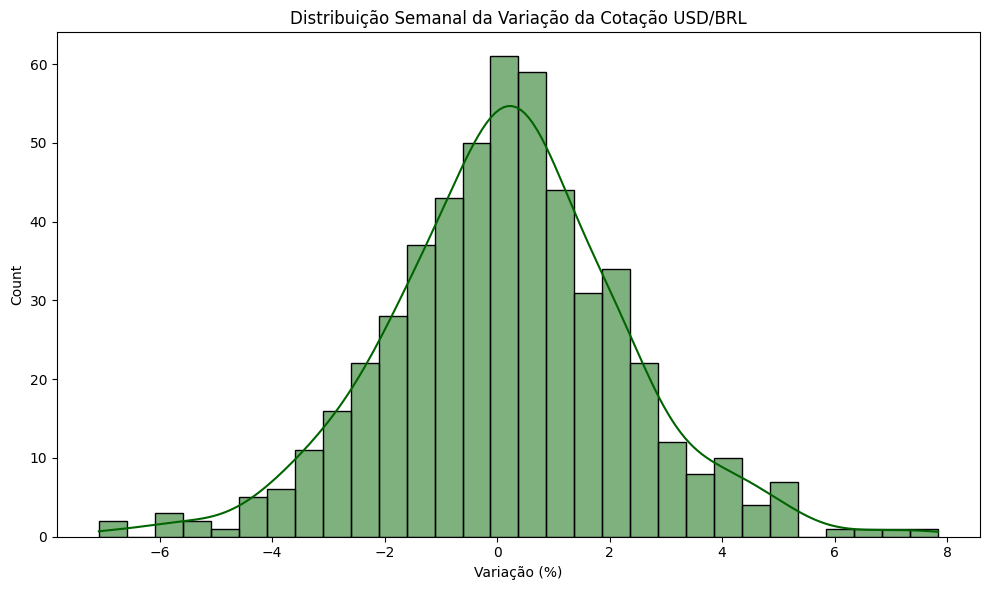

In [23]:
#Distribuição da Variação (%) da Cotação USD/BRL (Histograma)
plt.figure(figsize=(10,6))
sns.histplot(df_usd["Var%"].dropna(), bins=30, kde=True, color='darkgreen')
plt.xlabel("Variação (%)")
plt.title("Distribuição Semanal da Variação da Cotação USD/BRL")
plt.tight_layout()
plt.show()